## Observations and Insights 

In [1339]:
# Dependencies and Setup
#%matplotlib notebook
from matplotlib import cm
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.markers as ms
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data=mouse_metadata.merge(study_results,on="Mouse ID")

# Display the data table for preview
mouse_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [1340]:
# Checking the number of mice.
print(f"Total number of mouses: { mouse_data['Mouse ID'].nunique()}")


Total number of mouses: 249


In [1341]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicated = mouse_data[mouse_data.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()
print(f"There is {len(mouse_duplicated)}  mouse duplicated in {len(mouse_data)} records:  {mouse_duplicated} with {len(mouse_data[mouse_data['Mouse ID'] == mouse_duplicated[0]])} duplicated records.")


There is 1  mouse duplicated in 1893 records:  ['g989'] with 13 duplicated records.


In [1342]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data[mouse_data["Mouse ID"] == mouse_duplicated[0]]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1343]:
print(f"Duplicated records = {len(mouse_data[mouse_data['Mouse ID'] == mouse_duplicated[0]])}")



Duplicated records = 13


In [1344]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.set_index("Mouse ID",inplace=True)

mouse=mouse_data.drop(mouse_duplicated[0])


In [1345]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of unique mouses = {len(mouse.index.unique())}")


Number of unique mouses = 248


In [1346]:
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


## Summary Statistics

In [1347]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mouse_grp=mouse.groupby("Drug Regimen")
media=mouse_grp["Tumor Volume (mm3)"].mean()
mediana=mouse_grp["Tumor Volume (mm3)"].median()
varianza=mouse_grp["Tumor Volume (mm3)"].var()
estd=mouse_grp["Tumor Volume (mm3)"].std()
sem=mouse_grp["Tumor Volume (mm3)"].sem()
drugs=pd.Series(mouse_grp["Drug Regimen"].unique())


mouse_df=pd.DataFrame({"Drugs":drugs,"mean":media, "median":mediana, "variance":varianza, "standard deviation":estd, "SEM":sem})

mouse_df

,Drugs,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,,
Capomulin,[Capomulin],40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,[Ceftamin],52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,[Infubinol],52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,[Ketapril],55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,[Naftisol],54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,[Placebo],54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,[Propriva],52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,[Ramicane],40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,[Stelasyn],54.233149,52.431737,59.450562,7.710419,0.573111


In [1348]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
#mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


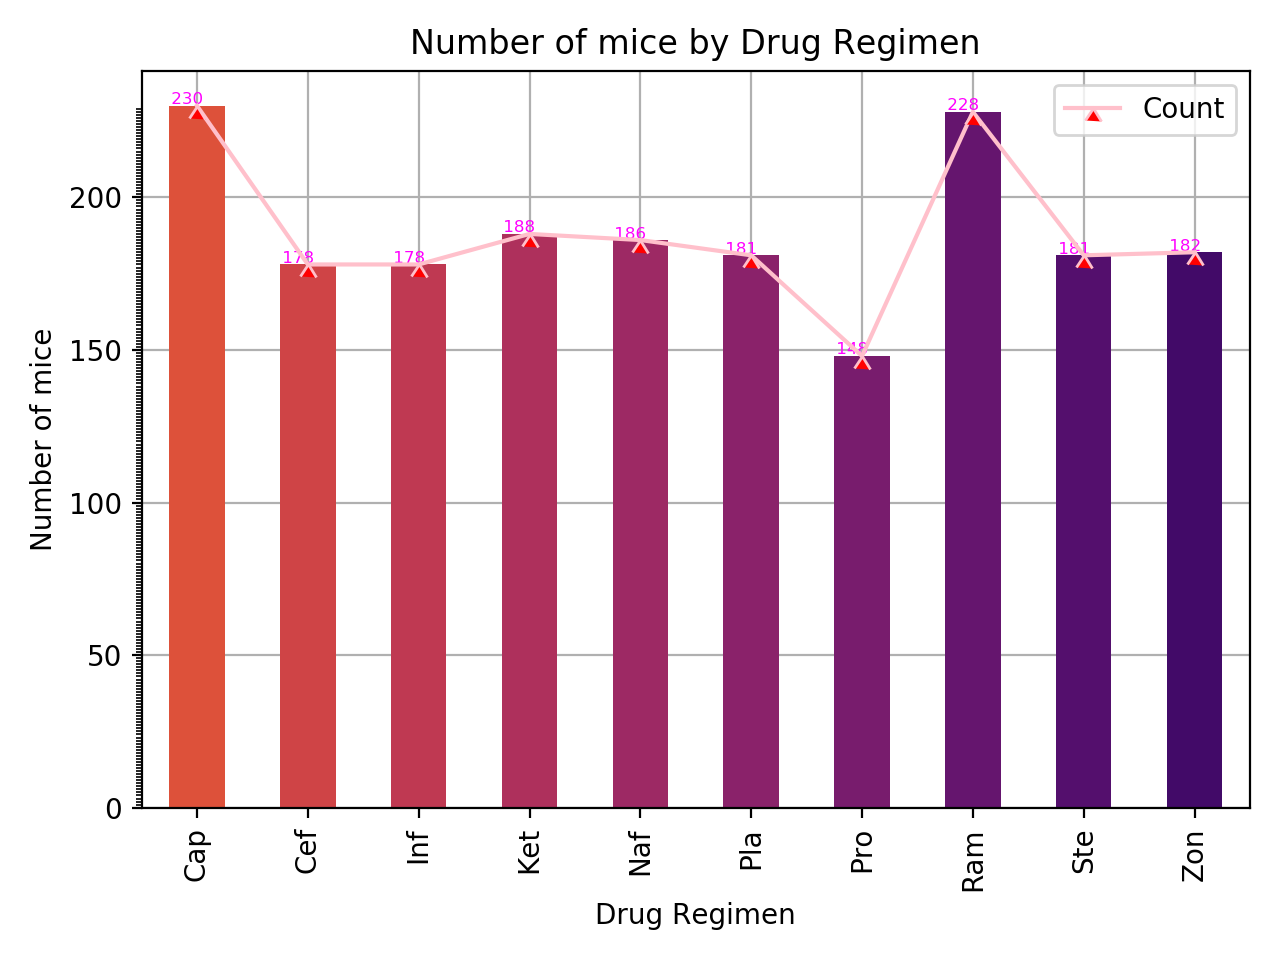

In [1350]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_grp=mouse.groupby("Drug Regimen")["Sex"].count()
m=pd.DataFrame(mouse_grp)

m.rename(columns={"Sex":"Count"},inplace=True)

color=list()
color = [cm.inferno_r(np.linspace(.4, .8, len(m)))]

fig, ax = plt.subplots()
line    = m.plot(kind="line",ax=ax,zorder=4,marker=ms.CARETUP,color="pink",markerfacecolor = 'r')
barlist = m.plot(kind="bar",zorder=2,ax=ax, color=color, legend=False )

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of mice")
ax.set_title("Number of mice by Drug Regimen")
index=0
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, f" {str(m.values[index][0])}" , fontsize=6,color='magenta')
    index+=1
ax.set_yticks([x for x in range(0,m["Count"].max())],30)
ax.set_xticklabels([x[:3] for x in m.index])
ax.grid()


plt.show
plt.tight_layout()

#

<IPython.core.display.Javascript object>


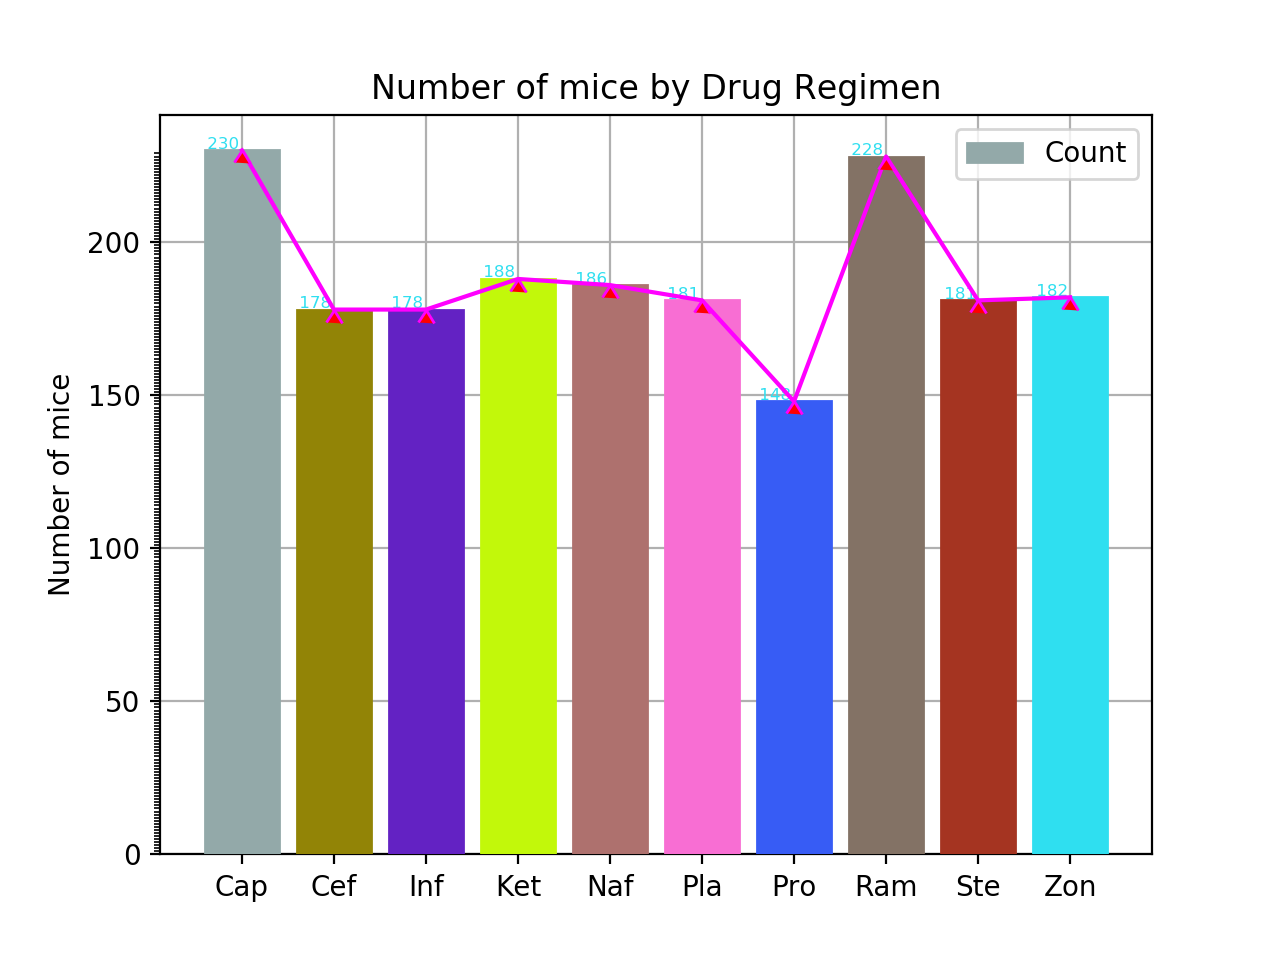

In [1351]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



fig, ax = plt.subplots()


bars = ax.bar(x=m.index,height=m["Count"],label="Count",zorder=3,)

for x in range(0,len(bars)):
    rgb=(random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1))
    bars[x].set_color(rgb)
    

index=0
for i in ax.patches:
    ax.text(i.get_x()-.03, i.get_height()+.5, f" {str(m.values[index][0])}" , fontsize=6,color=rgb)
    index+=1

ax.set_ylabel("Number of mice")
ax.set_title("Number of mice by Drug Regimen")
ax.grid(zorder=0)
ax.set_xticklabels([x[:3] for x in m.index])
bars.text=m.values
ax.set_yticks([x for x in range(0,m["Count"].max())],30)
line=ax.plot(m["Count"],zorder=4,marker=ms.CARETUP,color='magenta',markerfacecolor = 'r')
ax.legend()
plt.show()



In [1352]:
mouse_grp=mouse.groupby("Sex")
m=pd.DataFrame(mouse_grp.nunique())
m.rename(columns={"Sex":"Count"},inplace=True)



<IPython.core.display.Javascript object>


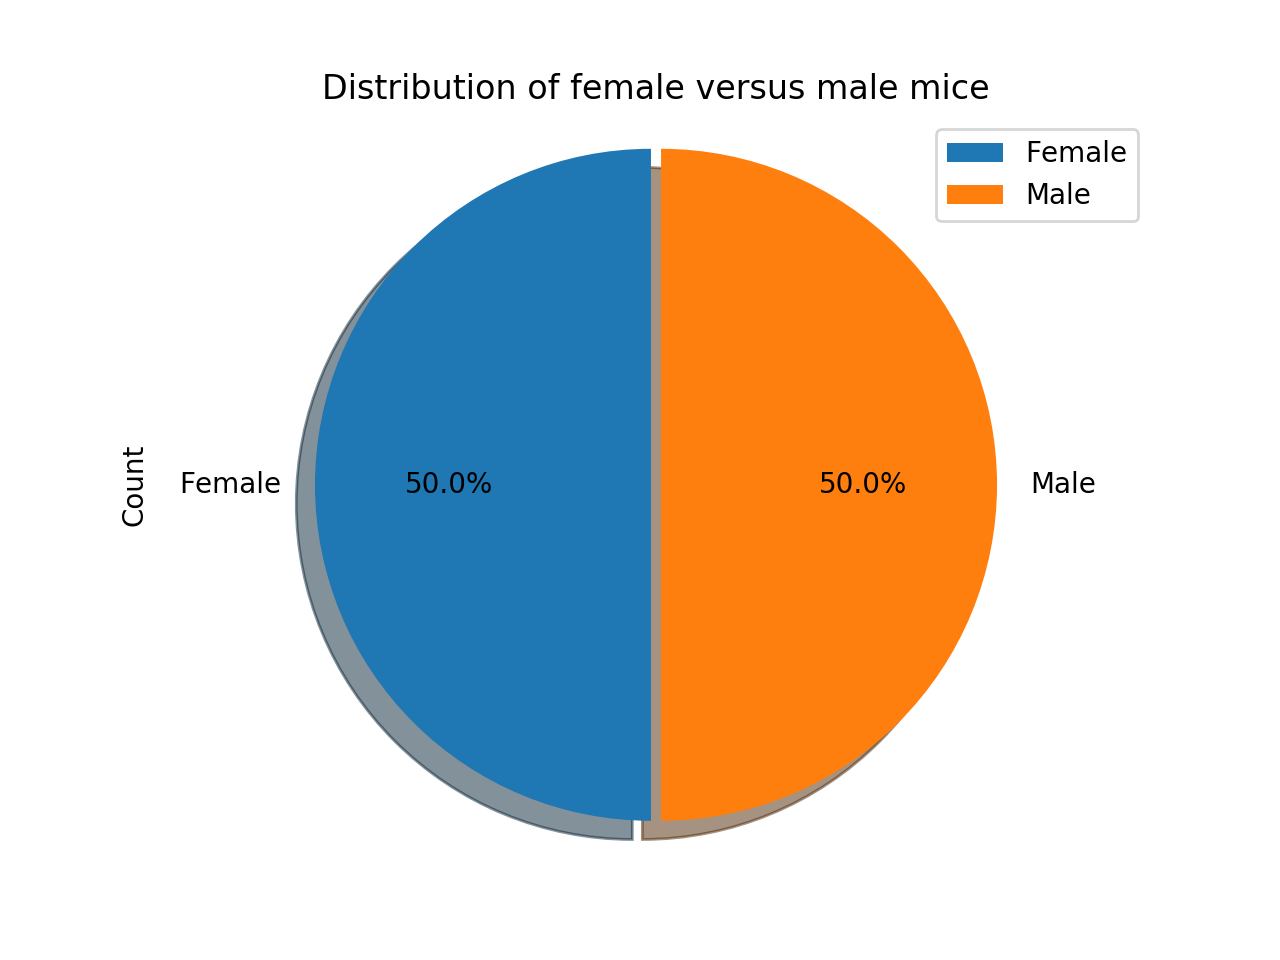

In [1353]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie = m.plot.pie(y="Count",explode=(0,0.03),autopct='%1.1f%%',shadow=True, startangle=90)
pie.set_title ("Distribution of female versus male mice")
pie.axis("equal")
plt.show()

<IPython.core.display.Javascript object>


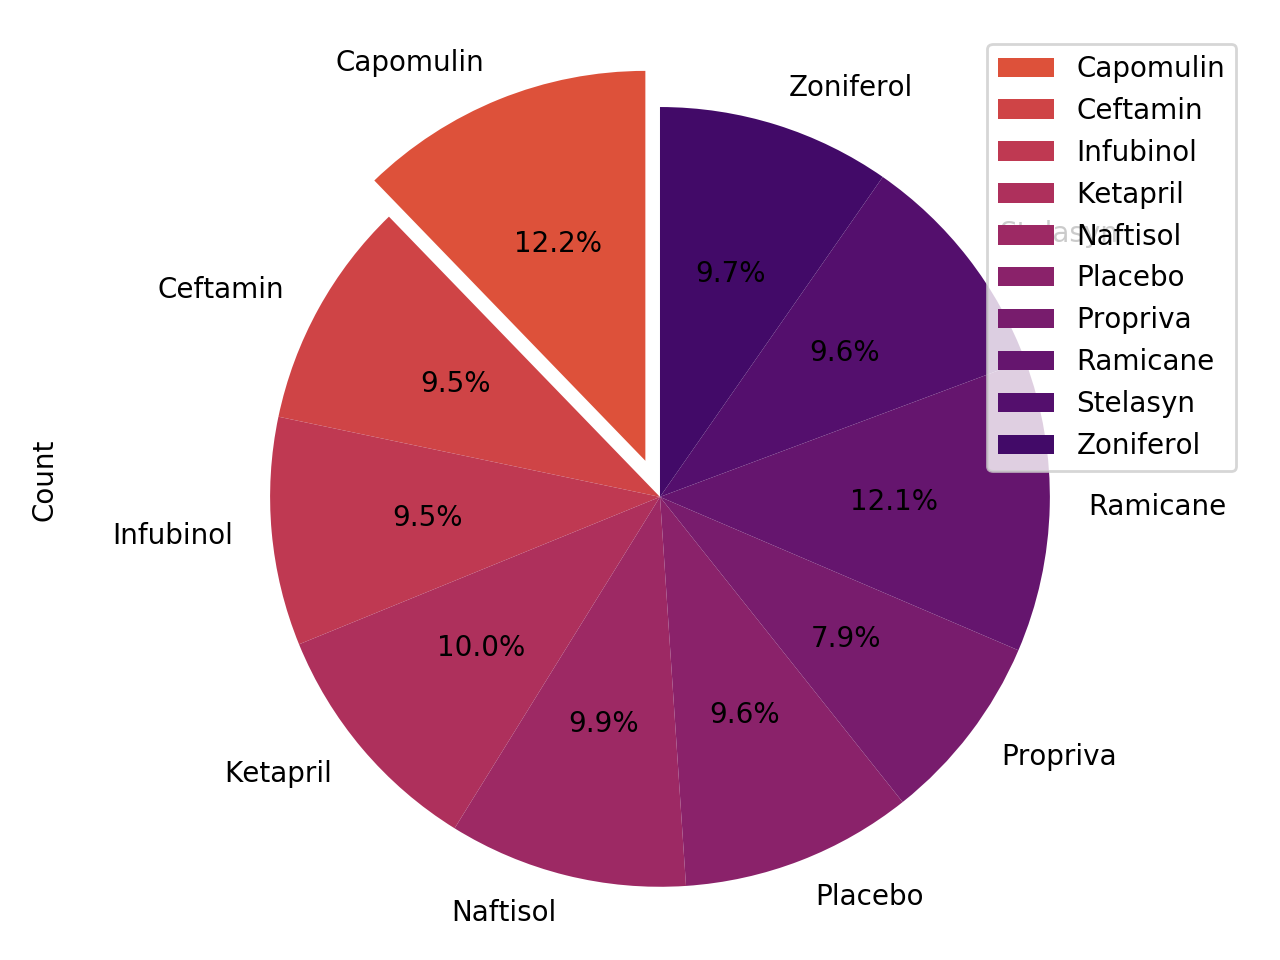

In [1354]:
#Bonus exercise , just for fun

mouse_grp=mouse.groupby("Drug Regimen")
m=pd.DataFrame(mouse_grp.nunique())



m=pd.DataFrame(mouse_grp["Sex"].count())
m.rename(columns={"Sex":"Count"},inplace=True)


#Explode the highest count
explode = [.10  if x == m.values.max() else 0.0 for x in m.values]
explode
#create a palette
color=list()
color = cm.inferno_r(np.linspace(.4, .8, len(m)))
#Plot
pie=m.plot(kind="pie",y="Count",explode=explode,autopct='%1.1f%%', startangle=90,colors=color)

pie.axis("equal")


plt.show()
plt.tight_layout()



## Quartiles, Outliers and Boxplots

In [1355]:
mouse

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [1356]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
mouse_grp=mouse[mouse["Drug Regimen"].isin(drugs) ]
timepoint=pd.DataFrame(mouse_grp.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max())
tumor=pd.DataFrame(mouse_grp.groupby(["Mouse ID","Drug Regimen","Timepoint"])["Tumor Volume (mm3)"].max())
timepoint.reset_index(inplace=True)
tumor.reset_index(inplace=True)
m=timepoint.merge(tumor,on=["Mouse ID","Drug Regimen","Timepoint"])

m

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [1358]:
# Put treatments into a list for for loop (and later for plot labels)
treatement = list()
treatement = m["Drug Regimen"].unique().tolist()
treatement

# Create empty list to fill with tumor vol data (for plotting)


vol = list()
tre = list()

tum=m["Tumor Volume (mm3)"]
quartiles = tum.quantile([.25,.5,.75])
             
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (.1*iqr)
upper_bound = upperq + (.1*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("\n")
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatement:
    vol.append(m[m["Drug Regimen"]==x]["Tumor Volume (mm3)"])


 
    
    # Determine outliers using upper and lower bounds
    
for t in range(len(treatement)):
    
    quartiles = pd.Series(vol[t]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (.1*iqr)
    upper_bound = upperq + (.1*iqr)
    print(f"Values below {lower_bound} could be outliers in drug regimen {treatement[t]}.")
    print(f"Values above {upper_bound} could be outliers in drug regimen {treatement[t]}.")
    print("\n")
    



Values below 34.91349200724999 could be outliers.
Values above 62.204513550250006 could be outliers.


Values below 52.900894173999994 could be outliers in drug regimen Infubinol.
Values above 66.673456366 could be outliers in drug regimen Infubinol.


Values below 47.164302632 could be outliers in drug regimen Ceftamin.
Values above 65.857605248 could be outliers in drug regimen Ceftamin.


Values below 30.650615878 could be outliers in drug regimen Ramicane.
Values above 41.568859941999996 could be outliers in drug regimen Ramicane.


Values below 31.599170493999996 could be outliers in drug regimen Capomulin.
Values above 40.937406646 could be outliers in drug regimen Capomulin.




<IPython.core.display.Javascript object>


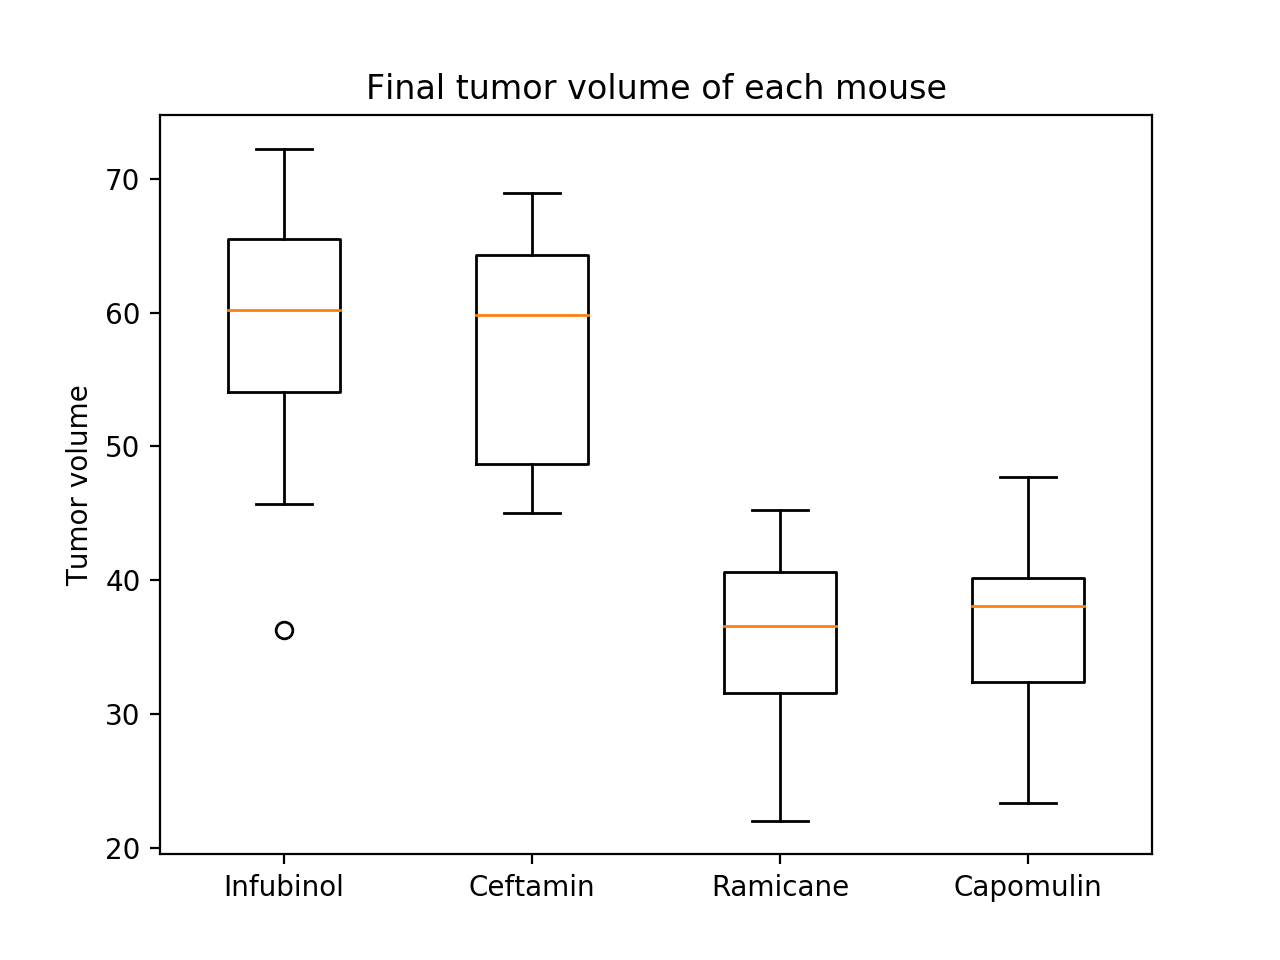

In [1361]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse')
ax1.set_ylabel('Tumor volume')
ax1.boxplot(vol,labels=treatement)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


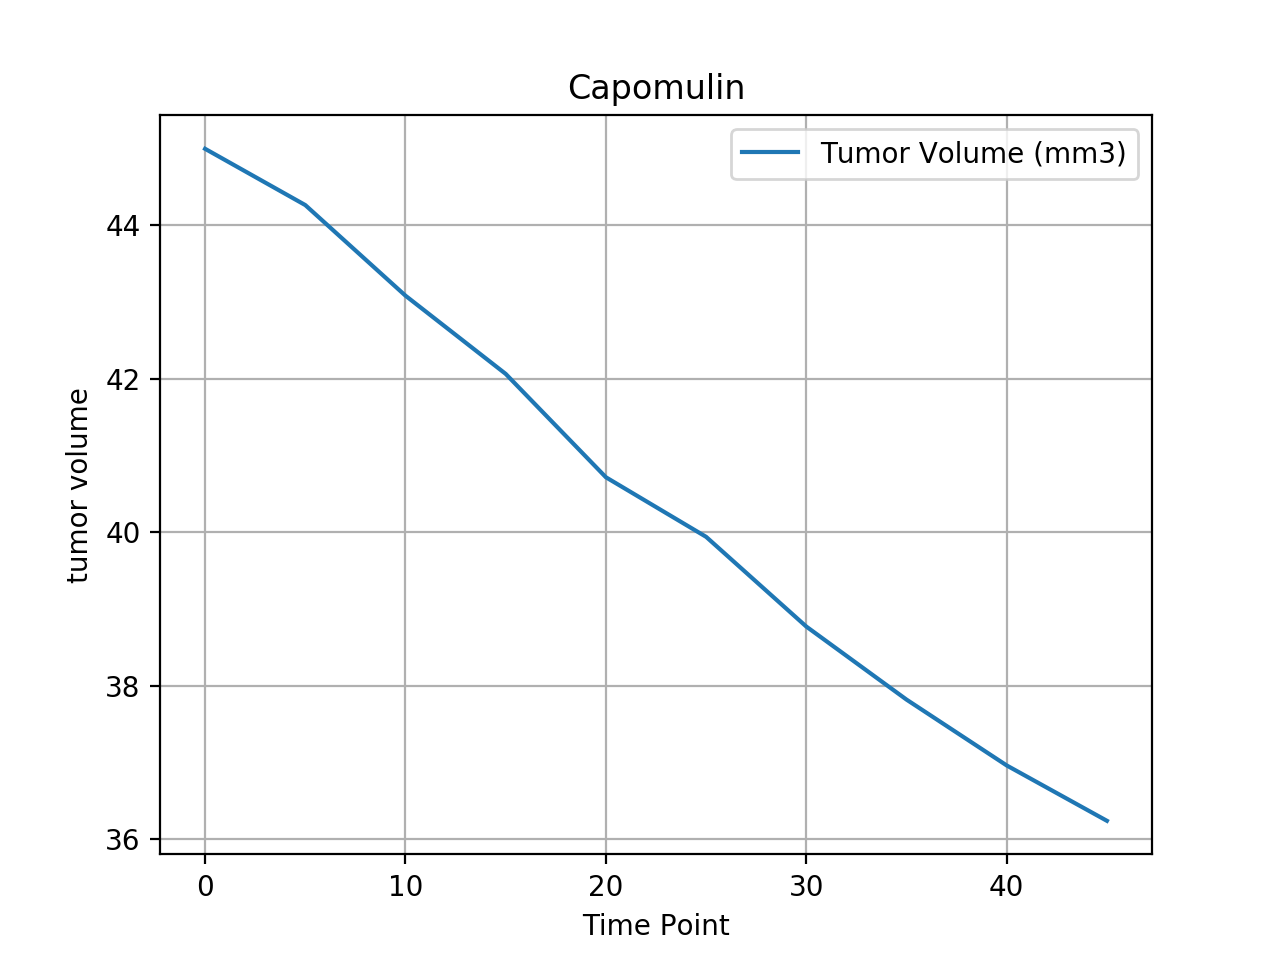

<function matplotlib.pyplot.show(*args, **kw)>

In [1365]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drugs = 'Capomulin'
mouse_grp=mouse[mouse["Drug Regimen"]==drugs]
m=pd.DataFrame(mouse_grp.groupby("Timepoint")["Tumor Volume (mm3)"].mean())
m
line = m.plot(kind="line")

#plt.grid()
line.set_xlabel("Time Point")
line.set_ylabel("tumor volume")
line.set_title(drugs)
plt.grid()
plt.show


<IPython.core.display.Javascript object>


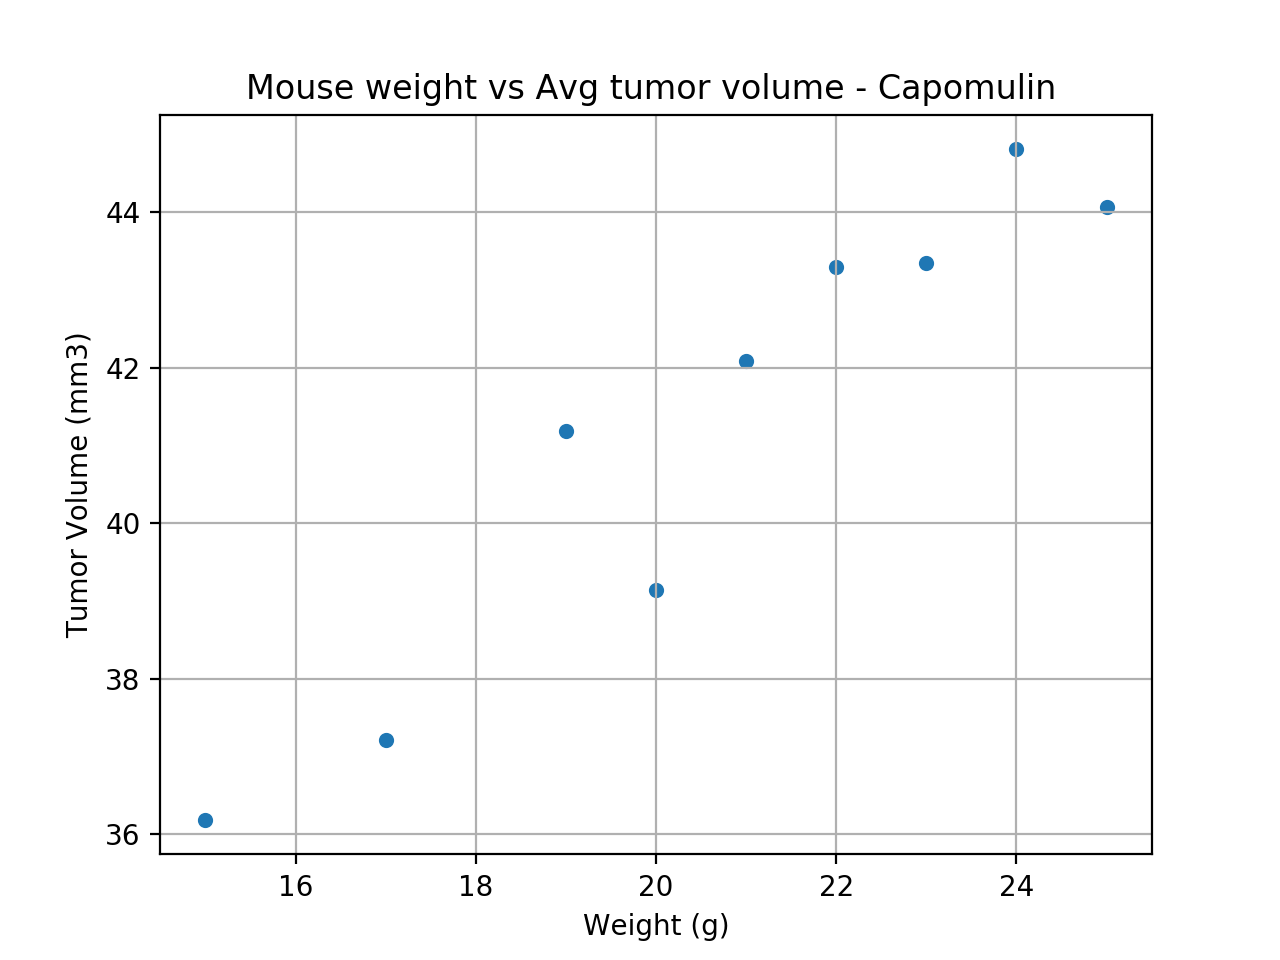

<function matplotlib.pyplot.show(*args, **kw)>

In [1366]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drugs = 'Capomulin'
mouse_grp=mouse[mouse["Drug Regimen"]==drugs]
m=pd.DataFrame(mouse_grp.groupby("Weight (g)")["Tumor Volume (mm3)"].mean())
m.reset_index(inplace=True)


scatter = m.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")




scatter.set_xlabel("Weight (g)")
scatter.set_ylabel("Tumor Volume (mm3)")
scatter.set_title("Mouse weight vs Avg tumor volume - Capomulin ")

plt.grid()
plt.show


## Correlation and Regression

In [1364]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight= m["Weight (g)"].values

tumor= m["Tumor Volume (mm3)"].values

print(f"The correlation coefficient mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(weight,tumor)[0],2)}")

The correlation coefficient mouse weight and average tumor volume for the Capomulin regimen is 0.95
